# Chapter 3: Linear Regression Exercises

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf


%matplotlib inline
plt.style.use('seaborn-white')
a = 10

pd.options.display.max_columns = None
pd.options.display.max_rows = 20

## Load datasets

In [126]:
auto = pd.read_csv('../Data/Auto.csv', na_values='?').dropna() #Contains missing values marked as '?'
auto.head(392)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


### Question 8 - Auto data set

##### a) Use the lm() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summary() function to print the results. Comment on the output. For example:

        - Is there a relationship between the predictor and the response?
        - How strong is the relationship between the predictor and the response?
        - Is the relationship between the predictor and the response positive or negative?
        - What is the predicted mpg associated with a horsepower of 98? What are the 
            associated 95% confidence and prediction intervals?

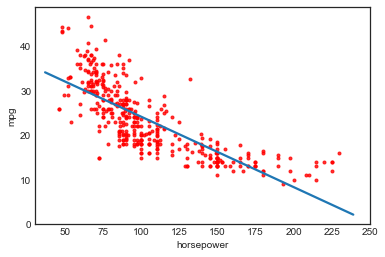

In [127]:
sns.regplot(auto.horsepower, auto.mpg, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(30,250)
plt.ylim(ymin=0);

In [128]:
simpleReg = smf.ols('mpg ~ horsepower', data=auto).fit() # Ordinary Least Squares regression
simpleReg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           7.03e-81
Time:                        14:07:26   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### - Is there a relationship between the predictor and the response?

    We can see from the summary that the predictor variable is siginificant with regards to the t-statistic, and the small p-value for the t-statistic tells us that there is a relationship
    

##### - How strong is the relationship between the predictor and the response?

    The adj. R-squared statistic records the percentage of variability in the response that is
    explained by the predictors, in this case 60.5%. It is not very good but still explains quite much.
    Since the t-statistic and the p-value are significant I would say that there is a strong (but not linear) 
    relationship between the predictor and response.
        
##### - Is the relationship between the predictor and the response positive or negative?

    The relationship is negative (When horsepower increases mpg decreases), which the
    negative coefficient also shows.      

##### - What is the predicted mpg associated with a horsepower of 98? What are the associated 95% confidence and prediction intervals?
      
      

In [129]:
#Prediction
pred=simpleReg.get_prediction({'horsepower': [98]})
#CI
pred.summary_frame(alpha=0.05) # 95% ci and prediction intervals

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


From the above table we can see that the predicted response for mpg is 24.47 when horsepower is 98. The associated 95% confidence interval is [23.97, 24] and the prediction interval is [14.81, 34.12]

##### b) Plot the response and the predictor. Use the abline() function to display the least squares regression line.

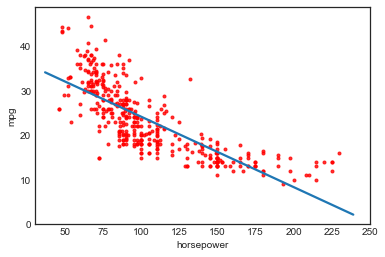

In [130]:
sns.regplot(auto.horsepower, auto.mpg, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(30,250)
plt.ylim(ymin=0);

##### c) Use the plot() function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

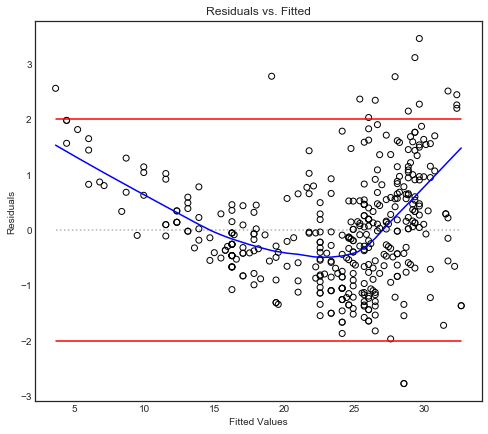

In [131]:
from statsmodels.nonparametric.smoothers_lowess import lowess

residuals = simpleReg.get_influence().resid_studentized_internal #Normalized residuals
fitted = simpleReg.fittedvalues
smoothed = lowess(residuals,fitted)
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()

ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0], smoothed[:,1], color = 'b')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)
ax.plot([min(fitted),max(fitted)],[2,2],color='r')
ax.plot([min(fitted),max(fitted)],[-2,-2],color='r')

We can clearly see that there is a pattern to the residuals, and there are also many outlier observations above |t| = 2 which means that the linearity and variance assumptions does not hold. The data would need to be transformed.

Text(0.5, 1.0, 'Normal Q-Q')

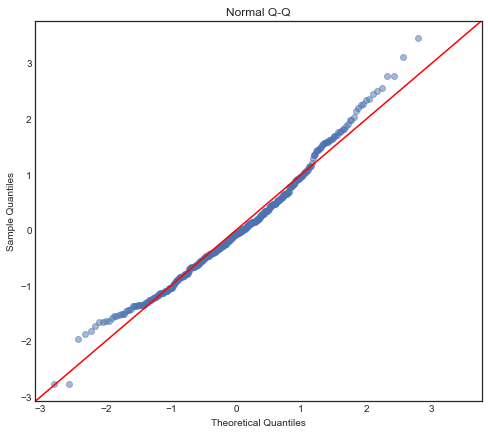

In [132]:
from statsmodels.graphics.gofplots import ProbPlot
QQ = ProbPlot(residuals)
normplot = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
normplot.axes[0].set_title('Normal Q-Q')

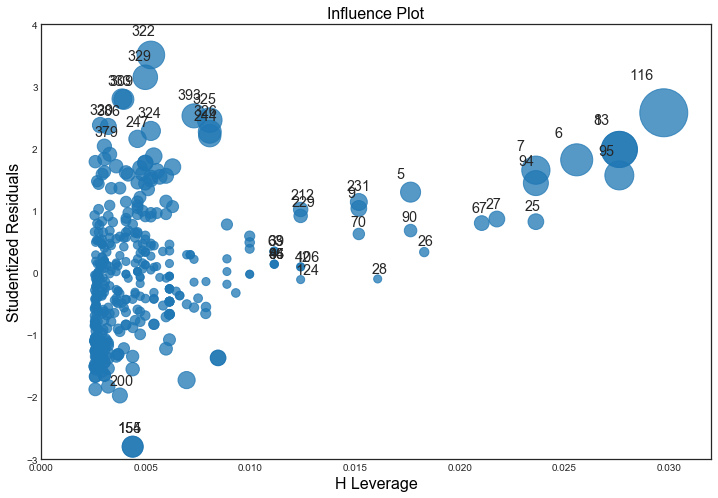

In [133]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlim([0,0.032])
ax.set_ylim([-3, 4])
fig = sm.graphics.influence_plot(simpleReg, ax=ax, criterion="cooks")

In the leverage vs residual plot above many outliers can clearly be identified. A large circle is corresponding to a large cooks distance for the corresponding observation.

### 9. This question involves the use of multiple linear regression on the Auto data set.

#### a) Produce a scatterplot matrix which includes all of the variables in the data set.



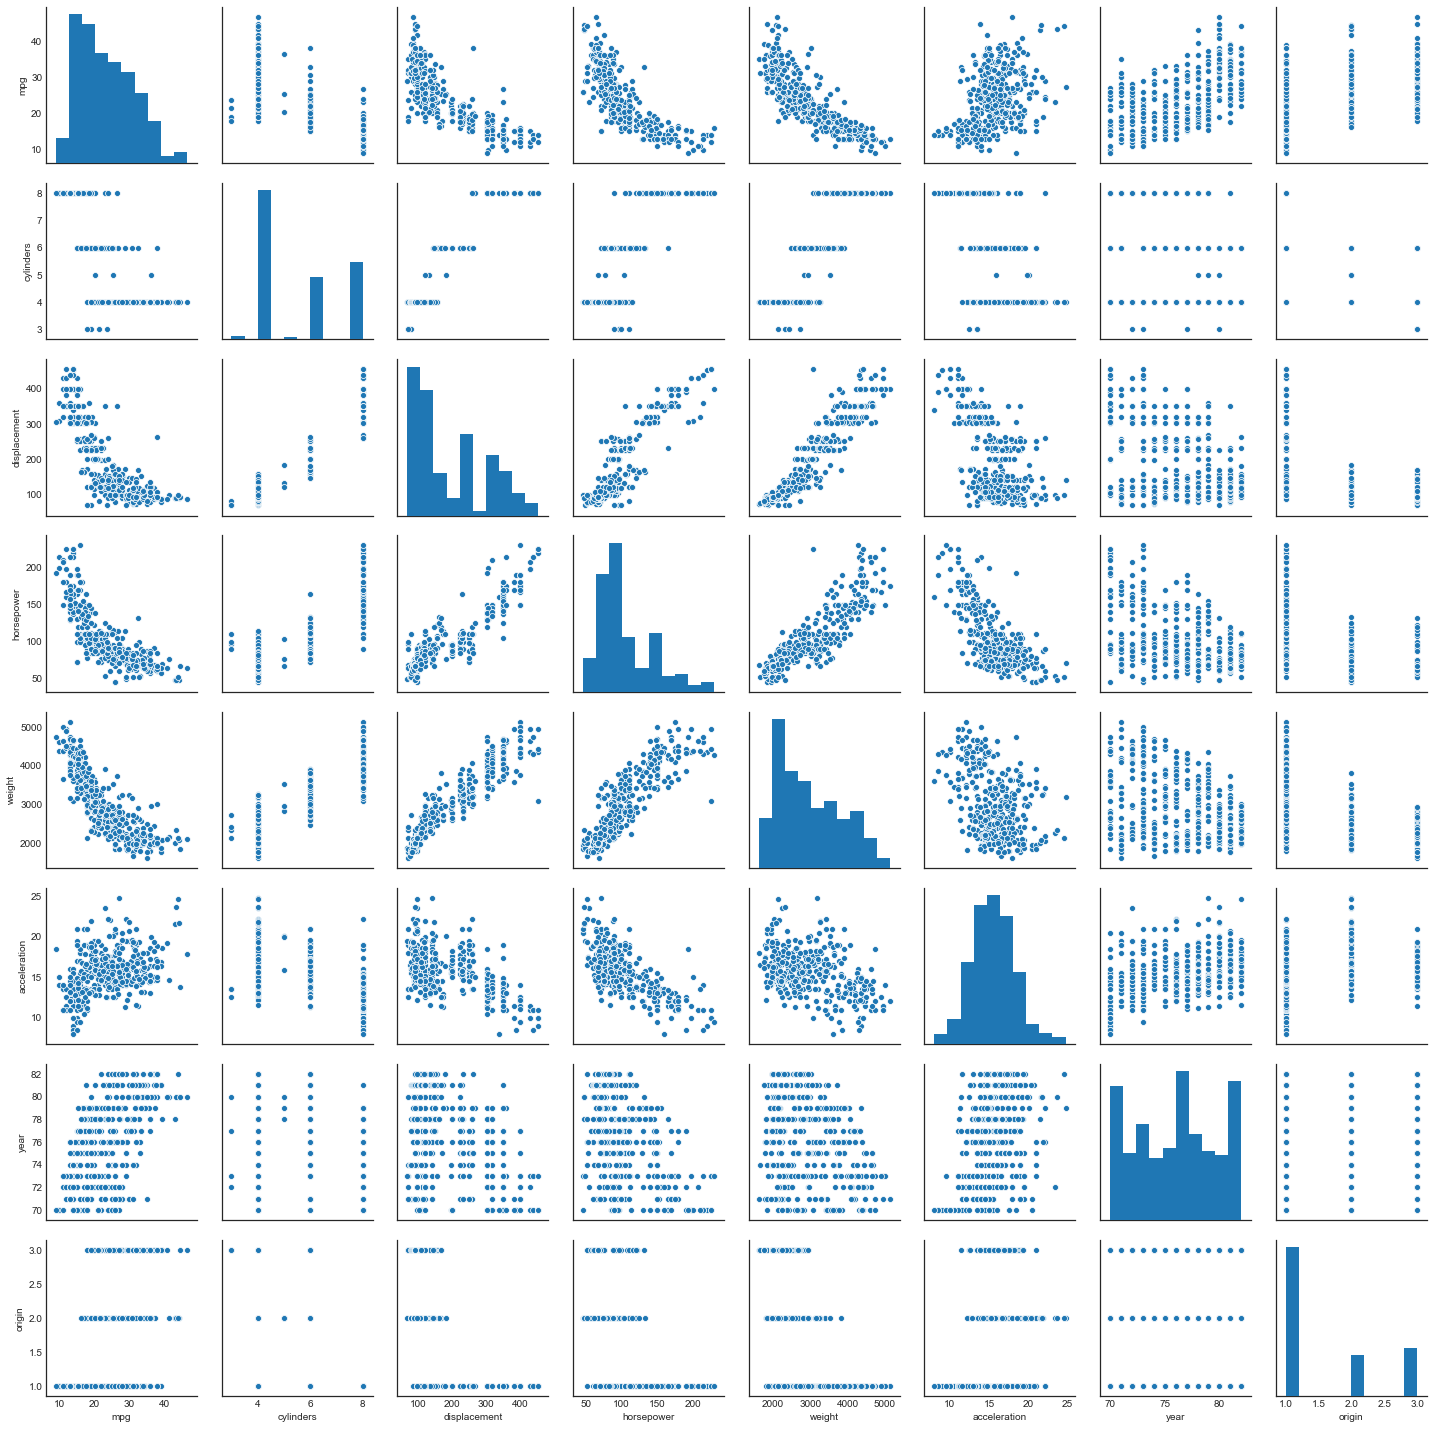

In [134]:
sns.pairplot(auto);

We can see fromt the plot that displacement, weight and horsepower seems to have quite a high degree of colinearity which means to improve the model we can only keep one of those in the future.

#### b) Compute the matrix of correlations between the variables using the function cor(). You will need to exclude the name variable, cor() which is qualitative.



In [135]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


We can see fromt the correlation matrix that cylinders, displacement, horsepower and weight have a high degree of correlation, which confirms our previous suspicion about colinear variables. Also acceleration seems to be correlated quite much with horsepower.

### c) Use the lm() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results. Comment on the output.

##### - Is there a relationship between the predictors and the response?
    


In [136]:
multiReg = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin',
                   data=auto).fit() 
multiReg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 09 Mar 2020   Prob (F-statistic):          2.04e-139
Time:                        14:07:44   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Yes, there is a relationship. This can be concluded by looking at the small p-value for the F-statistic or through the t-values of the predictors which in multiple cases are larger than 2.

##### - Which predictors appear to have a statistically significant relationship to the response?

It seems as displacement, weight, year and origin are statistically significant. However we have to keep in mind there is colinearity in this model.

##### - What does the coefficient for the year variable suggest?

The coefficient for year is positive, meaning that the more recent the car was made the more miles per gallon it can drive. This makes very much sense as the technology improves with each year.


##### d) Use the plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?



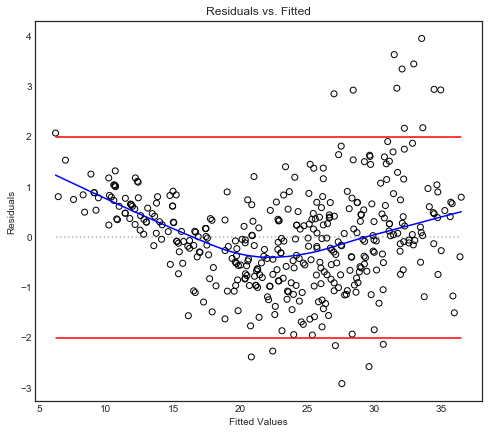

In [137]:
residuals = multiReg.get_influence().resid_studentized_internal #Normalized residuals
fitted = multiReg.fittedvalues
smoothed = lowess(residuals,fitted)
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()

ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0], smoothed[:,1], color = 'b')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)
ax.plot([min(fitted),max(fitted)],[2,2],color='r')
ax.plot([min(fitted),max(fitted)],[-2,-2],color='r')

There is a clear pattern to the residuals which violates the variance assumption.

Text(0.5, 1.0, 'Normal Q-Q')

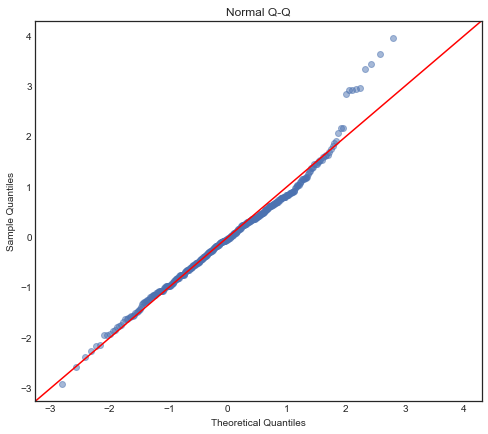

In [138]:
QQ = ProbPlot(residuals)
normplot = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
normplot.axes[0].set_title('Normal Q-Q')

Normal plot looks good exepct for the top part where there are some outliers.

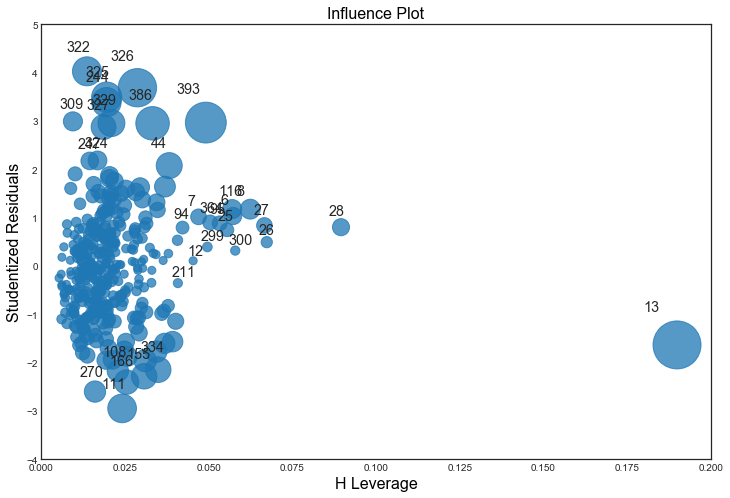

In [139]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlim([0,0.20])
ax.set_ylim([-4, 5])
fig = sm.graphics.influence_plot(multiReg, ax=ax, criterion="cooks")

In the leverage vs residual plot observation 13 is clearly a large outlier when it comes to leverage, but there are many other unusual observations as well which can easily be identified through their labeled observation id.

##### e) Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

In [140]:
interactionReg1 = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + weight : acceleration + acceleration : horsepower + weight : horsepower', data=auto).fit() 
interactionReg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     248.2
Date:                Mon, 09 Mar 2020   Prob (F-statistic):          4.56e-160
Time:                        14:07:46   Log-Likelihood:                -965.90
No. Observations:                 392   AIC:                             1954.
Df Residuals:                     381   BIC:                             1997.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.9017      7.540      0.120      0.905     -13.924      15.727
cylinders                   0.2621      0.294      0.892      0.373      -0.316       0.840
displacement               -0.0070      0.008     -0.936      0.350      -0.022       0.008
horsepower                 -0.1113      0.039     -2.836      0.005      -0.188      -0.034
weight                     -0.0131      0.003     -5.194      0.000      -0.018      -0.008
acceleration               -0.0077      0.295     -0.026      0.979      -0.587       0.572
year                        0.7609      0.045     17.088      0.000       0.673       0.848
origin                      0.7225      0.249      2.896      0.004       0.232       1.213
weight:acceleration         0.0002      0.000      1.621      0.106   -4.55e-05       0.000
acceleration:horsepower    -0.0087      0.002     -3.660      0.000      -0.013      -0.004
weight:horsepower        5.319e-05   6.61e-06      8.044      0.000    4.02e-05    6.62e-05
==============================================================================
Omnibus:                       31.030   Durbin-Watson:                   1.581
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.616
Skew:                           0.467   Prob(JB):                     1.13e-13
Kurtosis:                       4.667   Cond. No.                     2.10e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In the above model an interaction term is included between weight, acceleration and horsepower. The t-statistic tells us that there are significant interaction effects between acceleration and horsepower as well as between weight and horsepower. Including these terms also gave a better model with an ajd. R-squared of 86.3% compared to the 81.8% of the previous model.

##### f) Try a few different transformations of the variables, such as log(X), √X, X2. Comment on your findings

First, I decided I needed to account for the colinearity in the data and exclude cylinders, displacement and horsepower while keeping weight which is the most siginificant of the colinear variables. After som experimenting I also transformed mpg with the natural log and square root which improved the models' adj. R-squared and its residuals.

In [141]:
def log(x):
    return np.log(x)

def sqrt(x):
    return x**0.5

def square(x):
    return x**2


result = smf.ols('sqrt(log(mpg)) ~ weight + year + acceleration + origin', data=auto).fit() 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         sqrt(log(mpg))   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     705.5
Date:                Mon, 09 Mar 2020   Prob (F-statistic):          2.96e-176
Time:                        14:07:46   Log-Likelihood:                 772.18
No. Observations:                 392   AIC:                            -1534.
Df Residuals:                     387   BIC:                            -1514.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.3106      0.041     31.868      0.000       1.230       1.391
weight       -8.278e-05   2.73e-06    -30.375      0.000   -8.81e-05   -7.74e-05
year             0.0087      0.000     17.378      0.000       0.008       0.010
acceleration     0.0014      0.001      1.996      0.047    2.12e-05       0.003
origin           0.0081      0.003      3.060      0.002       0.003       0.013
==============================================================================
Omnibus:                       12.888   Durbin-Watson:                   1.367
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.694
Skew:                          -0.301   Prob(JB):                     0.000237
Kurtosis:                       3.812   Cond. No.                     7.43e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

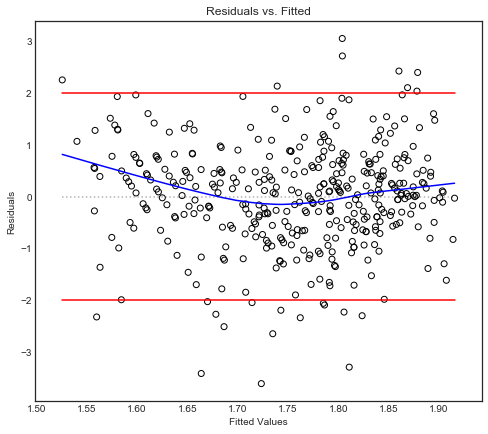

In [142]:
residuals = pd.Series(result.get_influence().resid_studentized_internal) #Normalized residuals

fitted = result.fittedvalues
smoothed = lowess(residuals,fitted)
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()

ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0], smoothed[:,1], color = 'b')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)
ax.plot([min(fitted),max(fitted)],[2,2],color='r')
ax.plot([min(fitted),max(fitted)],[-2,-2],color='r')

Text(0.5, 1.0, 'Normal Q-Q')

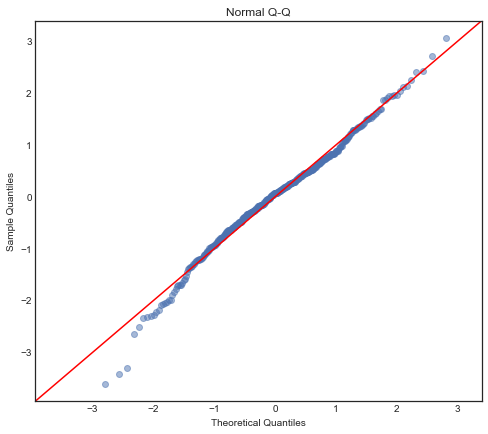

In [143]:
QQ = ProbPlot(residuals)
normplot = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
normplot.axes[0].set_title('Normal Q-Q')

The residuals vs fit now looks a lot better. There are however still quite a few outlying observations with large residual values, and the bottom parts of the normal plot warrants further investigation. Accelration which do not have a significant t-value can be removed.

In the end I also removed origin for the same reason and settled for the model below with an ajd. R-squared of 88.1% and more or less goodlooking residuals.

In [144]:
def log(x):
    return np.log(x)

def sqrt(x):
    return x**0.5

def square(x):
    return x**2


result = smf.ols('sqrt(log(mpg)) ~ log(weight) + year', data=auto).fit() 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         sqrt(log(mpg))   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     1450.
Date:                Mon, 09 Mar 2020   Prob (F-statistic):          4.60e-181
Time:                        14:07:46   Log-Likelihood:                 776.02
No. Observations:                 392   AIC:                            -1546.
Df Residuals:                     389   BIC:                            -1534.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.1832      0.070     45.463      0.000       3.046       3.321
log(weight)    -0.2681      0.006    -42.565      0.000      -0.280      -0.256
year            0.0093      0.000     19.387      0.000       0.008       0.010
==============================================================================
Omnibus:                       10.274   Durbin-Watson:                   1.407
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               17.812
Skew:                          -0.101   Prob(JB):                     0.000136
Kurtosis:                       4.024   Cond. No.                     3.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

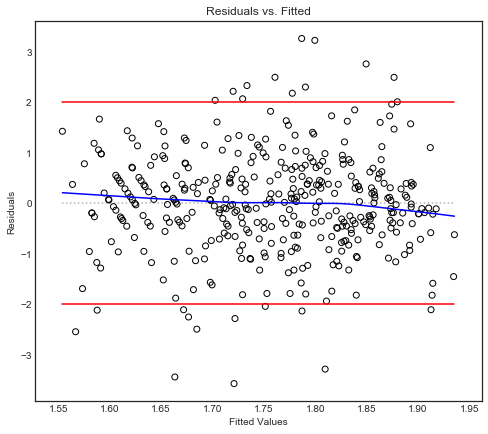

In [145]:
residuals = pd.Series(result.get_influence().resid_studentized_internal) #Normalized residuals

fitted = result.fittedvalues
smoothed = lowess(residuals,fitted)
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()

ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0], smoothed[:,1], color = 'b')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)
ax.plot([min(fitted),max(fitted)],[2,2],color='r')
ax.plot([min(fitted),max(fitted)],[-2,-2],color='r')

Text(0.5, 1.0, 'Normal Q-Q')

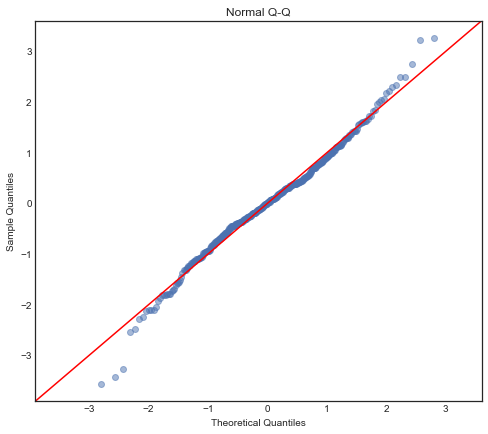

In [146]:
QQ = ProbPlot(residuals)
normplot = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
normplot.axes[0].set_title('Normal Q-Q')